In [26]:
import pandas as pd
df=pd.read_csv('data/upload_DJIA_table.csv')
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [27]:
df1 = df.reset_index()['Close']
df1 = df1.sort_index()
df1

0       11734.320312
1       11782.349609
2       11642.469727
3       11532.959961
4       11615.929688
            ...     
1984    17140.240234
1985    17409.720703
1986    17694.679688
1987    17929.990234
1988    17949.369141
Name: Close, Length: 1989, dtype: float64

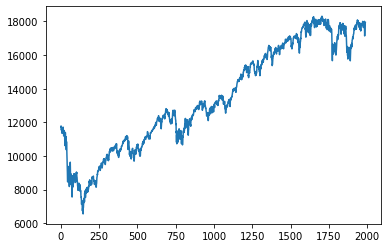

In [28]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [29]:
import numpy as np
df1

0       11734.320312
1       11782.349609
2       11642.469727
3       11532.959961
4       11615.929688
            ...     
1984    17140.240234
1985    17409.720703
1986    17694.679688
1987    17929.990234
1988    17949.369141
Name: Close, Length: 1989, dtype: float64

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.4408942 ]
 [0.44497647]
 [0.43308732]
 ...
 [0.9474974 ]
 [0.96749772]
 [0.96914484]]


In [31]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [32]:
training_size,test_size

(1292, 697)

In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:

print(X_train.shape), print(y_train.shape)

(1191, 100)
(1191,)


(None, None)

In [36]:
print(X_test.shape), print(ytest.shape)

(596, 100)
(596,)


(None, None)

In [37]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 8s 149ms/step - loss: 0.0508 - val_loss: 0.0827
Epoch 2/100
19/19 [==============================] - 2s 103ms/step - loss: 0.0048 - val_loss: 0.0206
Epoch 3/100
19/19 [==============================] - 2s 91ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/100
19/19 [==============================] - 2s 89ms/step - loss: 7.5750e-04 - val_loss: 0.0011
Epoch 5/100
19/19 [==============================] - 2s 89ms/step - loss: 7.1786e-04 - val_loss: 0.0011
Epoch 6/100
19/19 [==============================] - 2s 97ms/step - loss: 7.0398e-04 - val_loss: 9.9467e-04
Epoch 7/100
19/19 [==============================] - 2s 104ms/step - loss: 7.0343e-04 - val_loss: 0.0010
Epoch 8/100
19/19 [==============================] - 2s 113ms/step - loss: 7.2376e-04 - val_loss: 0.0011
Epoch 9/100
19/19 [==============================] - 2s 115ms/step - loss: 7.2788e-04 - val_loss: 0.0015
Epoch 10/100
19/19 [==============================] - 2s 99ms/step 

In [42]:
import tensorflow as tf

In [43]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 [==============================] - 0s 24ms/step


In [44]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11940.313709715369

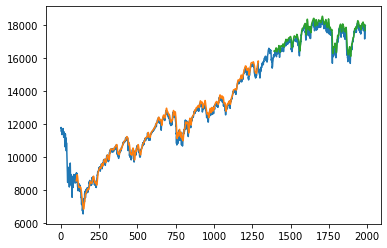

In [46]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()